# Characteristics of Time Series

In [69]:
# Load packages
using Distributions
using PyPlot
using RData

matplotlib.rcParams["text.usetex"] = true

true

## Exercise 1.1

In [8]:
# Load data
EQ5 = load("../data/EQ5.rda")
EXP6 = load("../data/EXP6.rda")

Dict{String,Any} with 1 entry:
  "EXP6" => [-0.00183743, -0.000553787, -0.00228387, -0.000302613, -0.000721216…

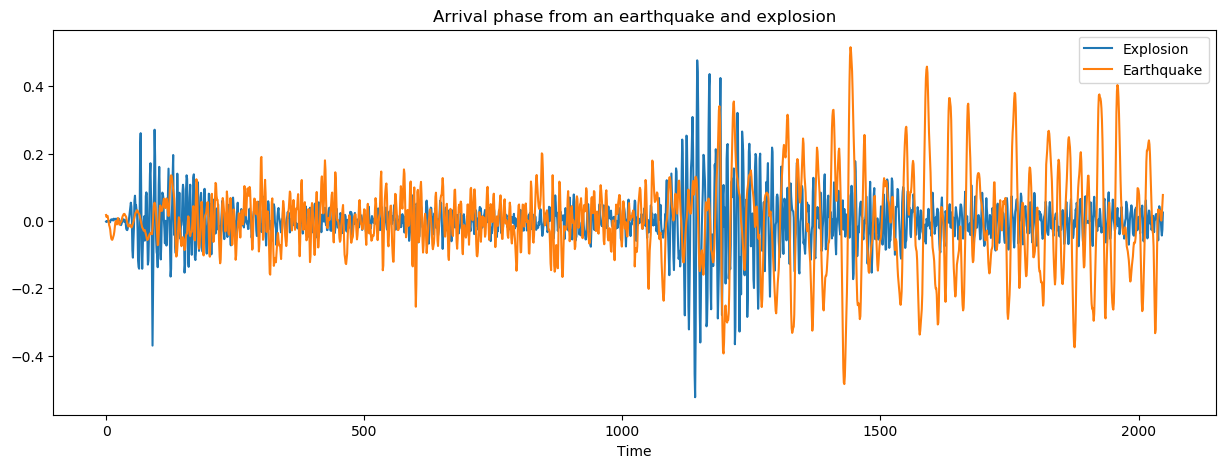

In [23]:
# Plot the data
figure(figsize=(15, 5))
plot(EXP6["EXP6"], label="Explosion")
plot(EQ5["EQ5"], label="Earthquake")
xlabel("Time")
legend()
title("Arrival phase from an earthquake and explosion")
show()

We observe that the earthquake follows the explosion. There should be a high correlation between the moment of the explosion and few moments later for the earthquake. Secondly, the intensity of the earthquake might depend on the intensity of the explosion.

## Exercise 1.2

Let's assume the following signal-plus-noise model:
$$x_t = s_t + w_t, \quad w_t \sim \mathcal{N}(0, 1)$$

* *Question (a)*

$x_t = s_t + w_t$, for $t = 1, \dots, 200$, where

$$s_t = \left\{
    \begin{array}{l l} 
        0, & t = 1, \dots, 100 \\ 
        10\exp{-\frac{(t - 100)}{20}}\cos{2\pi t / 4}, & t = 101, \dots, 200
    \end{array}
  \right.$$

In [77]:
function signal_a(t)
    if 0 < t < 101
        return 0
    elseif 100 < t < 201
        return 10 * exp(-(t - 100) / 20) * cos(2 * pi * t / 4)
    else
        "Wrong parameter"
    end
end

function signal_plus_noise_a(t)
    w = rand(Normal(), 1)[1]
    return signal_a(t) + w
end

signal_plus_noise_a (generic function with 1 method)

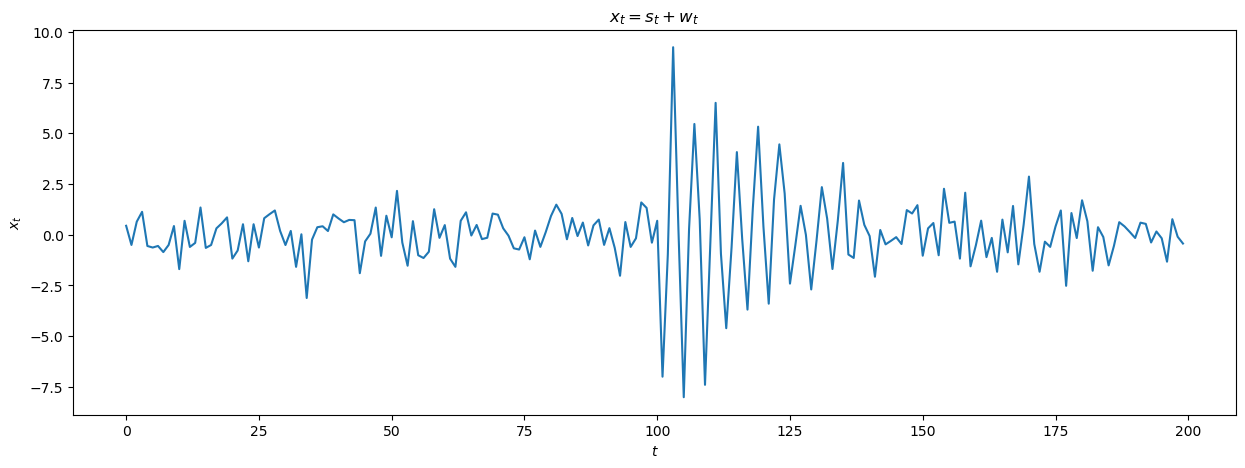

In [78]:
figure(figsize=(15, 5))
plot([signal_plus_noise_a(t) for t in 1:200])
xlabel(L"$t$")
ylabel(L"$x_t$")
title(L"x_t = s_t + w_t")
show()

* *Question (b)*

$x_t = s_t + w_t$, for $t = 1, \dots, 200$, where

$$s_t = \left\{
    \begin{array}{l l} 
        0, & t = 1, \dots, 100 \\ 
        10\exp{-\frac{(t - 100)}{200}}\cos{2\pi t / 4}, & t = 101, \dots, 200
    \end{array}
  \right.$$

In [79]:
function signal_b(t)
    if 0 < t < 101
        return 0
    elseif 100 < t < 201
        return 10 * exp(-(t - 100) / 200) * cos(2 * pi * t / 4)
    else
        "Wrong parameter"
    end
end

function signal_plus_noise_b(t)
    w = rand(Normal(), 1)[1]
    return signal_b(t) + w
end

signal_plus_noise_b (generic function with 1 method)

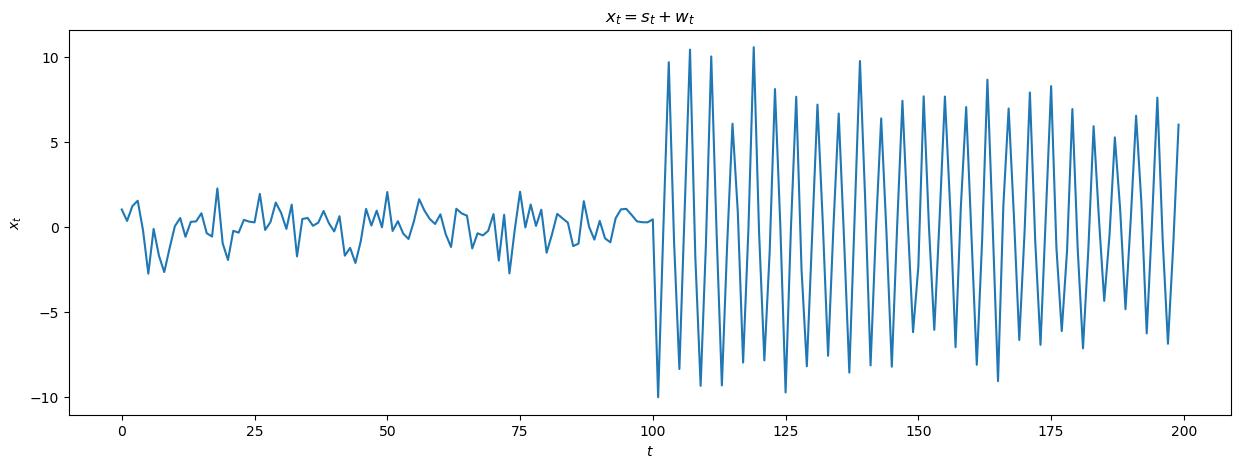

In [80]:
figure(figsize=(15, 5))
plot([signal_plus_noise_b(t) for t in 1:200])
xlabel(L"$t$")
ylabel(L"$x_t$")
title(L"x_t = s_t + w_t")
show()

* *Question (c)*

The serie (a) appears to be quite close to the explosion serie and the serie (b) appears to be quite close to the earthquake serie. Let's plot the signal modulators (a) $\exp(-t / 20)$ and (b) $\exp(-t / 200)$, for $t = 1, \dots, 100$.

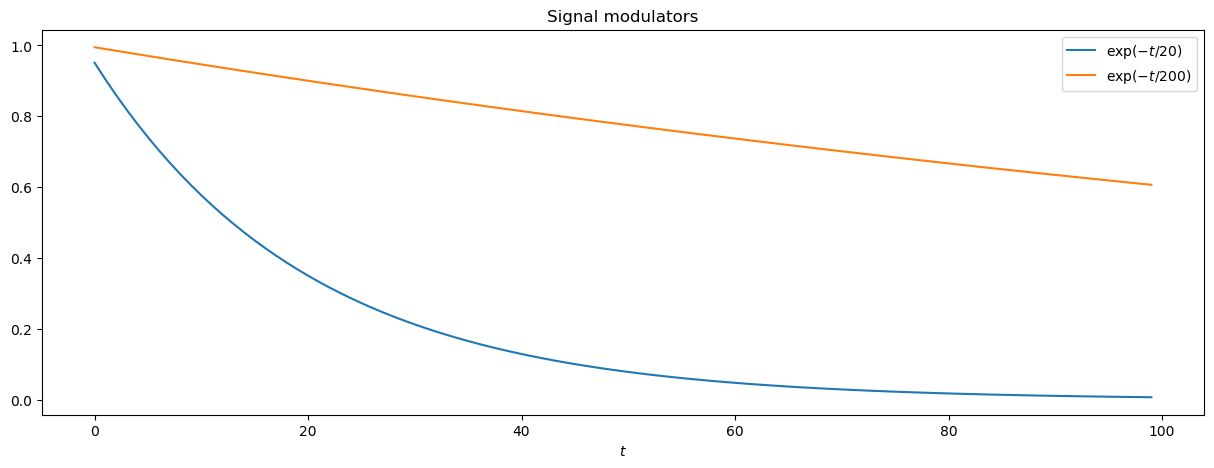

In [83]:
figure(figsize=(15, 5))
plot([exp(-t / 20) for t in 1:100], label=L"\exp(-t / 20)")
plot([exp(-t / 200) for t in 1:100], label=L"\exp(-t / 200)")
xlabel(L"$t$")
title("Signal modulators")
legend()
show()

The decreasing of the intensity of the first signal modulators is way larger than the second one.

## Exercise 1.3

* *Question (a)*

Consider the autoregression model:
$$x_t = -0.9x_{t-2} + w_t, \quad w_t \sim \mathcal{N}(0, 1).$$